In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [ ]:
df = pd.read_csv('/kaggle/input/diabetes-data-set/diabetes.csv')
df.shape

In [ ]:
[col for col in df.columns if df[col].isnull().sum()>0]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(labels = ['Outcome'],axis = 1),
    df['Outcome'],
    test_size = 0.3,
    random_state = 0
)

In [ ]:
constant_features = [
    features for features in x_train.columns if x_train[features].std()==9
]
len(constant_features)

###  **Constant Features**

In [ ]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Create a DataFrame with 100 rows and 5 random features
data = {
    'feature_1': np.random.normal(0, 1, 100),
    'feature_2': np.random.normal(5, 2, 100),
    'feature_3': np.random.randint(0, 10, 100),
    
    # Constant features
    'feature_4': 0,             # All zeros
    'feature_5': 3.1415         # All the same value
}

df = pd.DataFrame(data)

# Add a target column (for ML use)
df['target'] = np.random.choice([0, 1], size=100)

# Save to CSV (optional)
# df.to_csv("raw_dataset_with_constant_features.csv", index=False)

print(df.head())


In [ ]:
[col for col in df.columns if df[col].isnull().sum()>0]

### **Quasi Constant Features**

In [ ]:
quasi_constant_features = []
for feature in x_train.columns:
    predominant = (x_train[feature].value_counts()/np.float64(len(x_train))).sort_values(ascending=False).values[0]
    if predominant > 0.999:
        quasi_constant_features.append(feature)


# **Raw Data**

## Dataset 1

In [ ]:
import pandas as pd

# Load SECOM data and labels
data = pd.read_csv('/kaggle/input/secom-data/secom_data.csv', sep='\s+', header=None)
labels = pd.read_csv('/kaggle/input/secom-data/secom_labels.csv', sep='\s+', header=None)

# Keep only the label column (ignore timestamp)
labels = labels[[0]]
labels.columns = ['target']

# Combine features and target
df = pd.concat([data, labels], axis=1)

# Optional: Save combined dataset
df.to_csv('/content/secom_combined.csv', index=False)

# Preview
print(df.shape)
df.head()


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(labels = ['target'],axis = 1),
    df['target'],
    test_size = 0.3,
    random_state = 0
)

### **Duplicate Features**

In [ ]:
duplicate_feats = []

for i in range(len(x_train.columns)):
    col_1 = x_train.columns[i]
    for j in range(i + 1, len(x_train.columns)):
        col_2 = x_train.columns[j]
        if x_train[col_1].equals(x_train[col_2]):
            duplicate_feats.append(col_2)

print("Duplicate features:", duplicate_feats)
duplicate_features = set(duplicate_feats)
print(len(duplicate_features))
x_train.drop(labels = duplicate_features,axis = 1,inplace=True)
x_test.drop(labels = duplicate_features,axis = 1,inplace=True)



In [ ]:
duplicate_feats = []

for i in range(len(x_train.columns)):
    col_1 = x_train.columns[i]
    for j in range(i + 1, len(x_train.columns)):
        col_2 = x_train.columns[j]
        if x_train[col_1].equals(x_train[col_2]):
            duplicate_feats.append(col_2)

print("Duplicate features:", duplicate_feats)
duplicate_features = set(duplicate_feats)
print(len(duplicate_features))

### Quasi Constant

In [ ]:
quasi_constant_features = []
for feature in x_train.columns:
    predominant = (x_train[feature].value_counts()/np.float64(len(x_train))).sort_values(ascending=False).values[0]
    if predominant > 0.999:
        quasi_constant_features.append(feature)
print(len(quasi_constant_features))
x_train.drop(labels = quasi_constant_features,axis = 1,inplace=True)
x_test.drop(labels = quasi_constant_features,axis = 1,inplace=True)


In [ ]:
quasi_constant_features = []
for feature in x_train.columns:
    predominant = (x_train[feature].value_counts()/np.float64(len(x_train))).sort_values(ascending=False).values[0]
    if predominant > 0.999:
        quasi_constant_features.append(feature)
len(quasi_constant_features)

### Constant Features

In [ ]:
constant_features = [
    features for features in x_train.columns if x_train[features].std()==0
]
len(constant_features)

In [ ]:
x_train.drop(labels = constant_features,axis = 1,inplace=True)
x_test.drop(labels = constant_features,axis = 1,inplace=True)
constant_features = [
    features for features in x_train.columns if x_train[features].std()==0
]
len(constant_features)

NaN values

In [ ]:
print(df.isna().sum().sort_values(ascending=False).head())


Removing NaN with threshold 90%

In [ ]:
threshold = 0.9
df = df.loc[:, df.isna().mean() < threshold]
print(f"Remaining columns: {df.shape[1]}")

Filling rest of NaN values

In [ ]:
# Fill remaining NaNs with column median
df = df.fillna(df.median(numeric_only=True))


In [ ]:
print(df.isna().sum().sort_values(ascending=False).head())


### **Correlation**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(labels=['target'], axis=1),
    df['target'],
    test_size=0.3,
    random_state=0
)

In [ ]:
corr_mat = x_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(16,16)
sns.heatmap(corr_mat)

In [ ]:
grouped_feature_ls = []
correlated_groups = []

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # absolute correlation value
                colname = corr_matrix.columns[i]  # get column name
                col_corr.add(colname)
    return col_corr

# Usage example:
corr_features = correlation(x_train, 0.9)  # filter for features with correlation > 0.9
correlated_features = set(corr_features)  # unique features in the set
print(len(correlated_features))  # number of correlated features


In [ ]:
x_train.drop(labels=correlated_features,axis = 1,inplace = True)
x_test.drop(labels=correlated_features,axis = 1,inplace = True)

In [ ]:
grouped_feature_ls = []
correlated_groups = []

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # absolute correlation value
                colname = corr_matrix.columns[i]  # get column name
                col_corr.add(colname)
    return col_corr

# Usage example:
corr_features = correlation(x_train, 0.9)  # filter for features with correlation > 0.9
correlated_features = set(corr_features)  # unique features in the set
print(len(correlated_features))  # number of correlated features


### **Mutual Information**

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt

# fill missing values before MI computation
mi = mutual_info_classif(x_train.fillna(0), y_train, random_state=42)

# wrap into a pandas Series for readability
mi = pd.Series(mi, index=x_train.columns)

# sort and display
mi_sorted = mi.sort_values(ascending=False)
print(mi_sorted)

# plot
plt.figure(figsize=(20, 8))
mi_sorted.plot(kind="bar")
plt.title("Mutual Information scores for features")
plt.ylabel("Mutual Information")
plt.show()


In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Select top 10 features using Mutual Information
sel_ = SelectKBest(score_func=mutual_info_classif, k=10)
sel_.fit(x_train.fillna(0), y_train)

# Get the names of selected features
selected_features = x_train.columns[sel_.get_support()]
print("Top 10 features selected by mutual information:")
print(selected_features)


In [ ]:
# transform X_train and X_test to keep only selected features
X_train_selected = sel_.transform(x_train.fillna(0))
X_test_selected = sel_.transform(x_test.fillna(0))

# if you want a DataFrame with the feature names preserved:
selected_feature_names = x_train.columns[sel_.get_support()]
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_feature_names, index=x_train.index)
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_feature_names, index=x_test.index)

print("Transformed X_train shape:", X_train_selected_df.shape)
print("Transformed X_test shape:", X_test_selected_df.shape)


## Madelon

In [ ]:
import pandas as pd
import numpy as np

# Load training features
X_train = pd.read_csv('/kaggle/input/madelon-direct/madelon_train.data', sep='\s+', header=None)

# Load training labels
y_train = pd.read_csv('/kaggle/input/madelon-direct/madelon_train.labels', sep='\s+', header=None)
y_train = y_train[0]  # convert to Series

# Optionally: load validation and test data
X_valid = pd.read_csv('/kaggle/input/madelon-direct/madelon_valid.data', sep='\s+', header=None)
X_test = pd.read_csv('/kaggle/input/madelon-direct/madelon_test.data', sep='\s+', header=None)

# Confirm shapes
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_valid:", X_valid.shape)
print("X_test:", X_test.shape)


# **WEEK - 3**

In [ ]:
import pandas as pd

# Load the training and test datasets
train_df = pd.read_csv('/kaggle/input/customer-satisfaction/Santander Customer Satisfaction_train.csv')
test_df = pd.read_csv('/kaggle/input/customer-satisfaction/Santander Customer Satisfaction_test.csv')

# Print basic info
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# Separate features and target from train data
X_train = train_df.drop(columns=['TARGET'])
y_train = train_df['TARGET']

# Drop 'ID' from both datasets before model training
X_train = X_train.drop(columns=['ID'])
X_test = test_df.drop(columns=['ID'])

# Combine X and y into a single DataFrame for feature selection
df = pd.concat([X_train, y_train], axis=1)

# Verify shape and structure
print("Combined dataframe shape:", df.shape)
print("Columns:", df.columns[-5:])  # Show last few columns (should include 'TARGET')

# Rename TARGET column if needed
df.rename(columns={'TARGET': 'target'}, inplace=True)

# Preview
print("\n✅ Cleaned datasets ready:")
print(f"Features (X_train): {X_train.shape}")
print(f"Target (y_train): {y_train.shape}")
print(f"Test features (X_test): {X_test.shape}")

# Sample preview
print("\nX_train sample:")
print(X_train.head())
print("\nTarget distribution:")
print(y_train.value_counts())


In [ ]:
#Constant 
constantFeatures = [f for f in X_train.columns if X_train[f].std() == 0]
print(len(constantFeatures))
X_train.drop(labels = constantFeatures, axis  = 1, inplace = True)
X_test.drop(labels = constantFeatures, axis  = 1, inplace = True)

In [ ]:
constantFeatures = [f for f in X_train.columns if X_train[f].std() == 0]
print(len(constantFeatures))

In [ ]:
#Quasi Constant
qConsFeats = []
for f in X_train.columns:
    predominant =  (X_train[f].value_counts()/np.float64(len(X_train))).sort_values(ascending=False).values[0]
    if predominant > 0.999:
        qConsFeats.append(f)
print(len(qConsFeats))

In [ ]:
X_train.drop(labels = qConsFeats, axis  = 1, inplace = True)
X_test.drop(labels = qConsFeats, axis  = 1, inplace = True)

In [ ]:
qConsFeats = []
for f in X_train.columns:
    predominant =  (X_train[f].value_counts()/np.float64(len(X_train))).sort_values(ascending=False).values[0]
    if predominant > 0.999:
        qConsFeats.append(f)
print(len(qConsFeats))

In [ ]:
#Duplicate Features
dFeats = []
for i in range(len(X_train.columns)):
    col1 = X_train.columns[i]
    for i in range(i+1,len(X_train.columns)):
        col2 = X_train.columns[i]
        if X_train[col1].equals(X_train[col2]):
            dFeats.append(col2)
print(len(dFeats))

In [ ]:
X_train.drop(labels = dFeats, axis  = 1, inplace = True)
X_test.drop(labels = dFeats, axis  = 1, inplace = True)

In [ ]:
#Duplicate Features
dFeats = []
for i in range(len(X_train.columns)):
    col1 = X_train.columns[i]
    for i in range(i+1,len(X_train.columns)):
        col2 = X_train.columns[i]
        if X_train[col1].equals(X_train[col2]):
            dFeats.append(col2)
print(len(dFeats))

In [ ]:
corr_mat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(16,16)
sns.heatmap(corr_mat)

In [ ]:
#Correlation

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # absolute correlation value
                colname = corr_matrix.columns[i]  # get column name
                col_corr.add(colname)
    return col_corr

# Usage example:
corr_features = correlation(X_train, 0.9)  # filter for features with correlation > 0.9
correlated_features = set(corr_features)  # unique features in the set
print(len(correlated_features))  # number of correlated feature

In [ ]:
X_train.drop(labels = correlated_features, axis  = 1, inplace = True)
X_test.drop(labels = correlated_features, axis  = 1, inplace = True)

In [ ]:
#Correlation

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # absolute correlation value
                colname = corr_matrix.columns[i]  # get column name
                col_corr.add(colname)
    return col_corr

# Usage example:
corr_features = correlation(X_train, 0.9)  # filter for features with correlation > 0.9
correlated_features = set(corr_features)  # unique features in the set
print(len(correlated_features))  # number of correlated feature

In [ ]:
#Mutual Information
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# fill missing values before MI computation
mi = mutual_info_classif(X_train.fillna(0), y_train, random_state=42)

# wrap into a pandas Series for readability
mi = pd.Series(mi, index=X_train.columns)

# sort and display
mi_sorted = mi.sort_values(ascending=False)
print(mi_sorted)

# plot
plt.figure(figsize=(20, 8))
mi_sorted.plot(kind="bar")
plt.title("Mutual Information scores for features")
plt.ylabel("Mutual Information")
plt.show()

In [ ]:
# Select top 10 features using Mutual Information
sel_ = SelectKBest(score_func=mutual_info_classif, k=10)
sel_.fit(X_train.fillna(0), y_train)

# Get the names of selected features
selected_features = X_train.columns[sel_.get_support()]
print("Top 10 features selected by mutual information:")
print(selected_features)

In [ ]:


# transform X_train and X_test to keep only selected features
X_train_selected = sel_.transform(X_train.fillna(0))
X_test_selected = sel_.transform(X_test.fillna(0))

# if you want a DataFrame with the feature names preserved:
selected_feature_names = X_train.columns[sel_.get_support()]
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_feature_names, index=X_train.index)
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_feature_names, index=X_test.index)

print("Transformed X_train shape:", X_train_selected_df.shape)
print("Transformed X_test shape:", X_test_selected_df.shape)


In [ ]:
#Chi-Square
from sklearn.feature_selection import chi2

In [ ]:
#Replace negative values with 0
X_train[X_train < 0] = 0
X_test[X_test < 0] = 0

In [ ]:
f_score = chi2(X_train.fillna(0),y_train)
print(f"f-score {f_score}")

In [ ]:
pvalues = pd.Series(f_score[1])
pvalues.index = X_train.columns
pvalues.sort_values(ascending=True)


In [ ]:
significant_features = pvalues[pvalues < 0.05].index.tolist()

X_train_selected_df = X_train[significant_features]
X_test_selected_df = X_test[significant_features]

print(f"Selected {len(significant_features)} features with p < 0.05")


In [ ]:
#Annova
from sklearn.feature_selection import f_classif

In [ ]:
f_score, p_value = f_classif(X_train, y_train)
print("F-scores:", f_score)
print("p-values:", p_value)

In [ ]:
import pandas as pd

p_values_series = pd.Series(p_value, index=X_train.columns)
f_scores_series = pd.Series(f_score, index=X_train.columns)

# Sort by p-value (ascending = more significant)
sorted_p = p_values_series.sort_values()
print(sorted_p)

In [ ]:
selected_features = sorted_p[sorted_p < 0.05].index.tolist()

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [ ]:
print(f"Number of selected features: {len(selected_features)}")
print(f"X_train_selected shape: {X_train_selected.shape}")
print(f"X_test_selected shape: {X_test_selected.shape}")


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels = ['target'],axis = 1),
    df['target'],
    test_size = 0.3,
    random_state = 0
)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd

roc_values = []

for feature in X_train.columns:
    clf = DecisionTreeClassifier()
    
    # Reshape the feature into 2D with .to_frame()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    
    # Predict probabilities
    y_scored = clf.predict_proba(X_test[feature].fillna(0).to_frame())
    
    # Compute ROC AUC for the positive class
    auc = roc_auc_score(y_test, y_scored[:, 1])
    roc_values.append(auc)

# Convert to Series with feature names as index
roc_values = pd.Series(roc_values, index=X_train.columns)

# Sort by AUC value
roc_values_sorted = roc_values.sort_values(ascending=False)

# Print number of features better than random
print(f"Number of features with ROC AUC > 0.6: {len(roc_values[roc_values > 0.6])}")


In [ ]:
top_features = roc_values.sort_values(ascending=False)
print(top_features.head(10))  # top 10 features

In [ ]:
selected_features = roc_values[roc_values > 0.6].index.tolist()
selected_features

In [ ]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

### Wrapper

In [ ]:
import pandas as pd

# Load the training and test datasets
train_df = pd.read_csv('/kaggle/input/customer-satisfaction/Santander Customer Satisfaction_train.csv')
test_df = pd.read_csv('/kaggle/input/customer-satisfaction/Santander Customer Satisfaction_test.csv')

# Print basic info
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# Separate features and target from train data
X_train = train_df.drop(columns=['TARGET'])
y_train = train_df['TARGET']

# Drop 'ID' from both datasets before model training
X_train = X_train.drop(columns=['ID'])
X_test = test_df.drop(columns=['ID'])

# Combine X and y into a single DataFrame for feature selection
df = pd.concat([X_train, y_train], axis=1)

# Verify shape and structure
print("Combined dataframe shape:", df.shape)
print("Columns:", df.columns[-5:])  # Show last few columns (should include 'TARGET')

# Rename TARGET column if needed
df.rename(columns={'TARGET': 'target'}, inplace=True)

# Preview
print("\n✅ Cleaned datasets ready:")
print(f"Features (X_train): {X_train.shape}")
print(f"Target (y_train): {y_train.shape}")
print(f"Test features (X_test): {X_test.shape}")

# Sample preview
print("\nX_train sample:")
print(X_train.head())
print("\nTarget distribution:")
print(y_train.value_counts())


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [ ]:

# Step 1: Define SFS with RandomForestClassifier
sfs1 = SFS(RandomForestClassifier(n_jobs=4, random_state=42),  # 4 CPU cores
           k_features=1,              # Select best 5 features
           forward=True,             # Forward Selection
           floating=False,           # No floating
           verbose=2,                # Print progress
           scoring='roc_auc',        # Use ROC AUC as the metric
           cv=3)                     # 3-fold cross-validation

# Step 2: Fit the model
sfs1 = sfs1.fit(np.array(X_train.fillna(0)), y_train)

# Step 3: Output results
print('Best ROC AUC score: %.4f' % sfs1.k_score_)                     # Best cross-validated ROC AUC score
print('Best subset (indices):', sfs1.k_feature_idx_)                 # Indices of best features
print('Best subset (names):', list(X_train.columns[list(sfs1.k_feature_idx_)]))  # Column names of best features


In [ ]:

# Step 1: Define SFS with RandomForestClassifier
sfs1 = SFS(RandomForestClassifier(n_jobs=4, random_state=42),  # 4 CPU cores
           k_features=1,              # Select best 5 features
           forward=False,             # Forward Selection
           floating=False,           # No floating
           verbose=2,                # Print progress
           scoring='roc_auc',        # Use ROC AUC as the metric
           cv=3)                     # 3-fold cross-validation

# Step 2: Fit the model
sfs1 = sfs1.fit(np.array(X_train.fillna(0)), y_train)

# Step 3: Output results
print('Best ROC AUC score: %.4f' % sfs1.k_score_)                     # Best cross-validated ROC AUC score
print('Best subset (indices):', sfs1.k_feature_idx_)                 # Indices of best features
print('Best subset (names):', list(X_train.columns[list(sfs1.k_feature_idx_)]))  # Column names of best features


# Titanic

In [ ]:
titanic_train = pd.read_csv('/kaggle/input/titanic-dataset/titanic_train.csv')
titanic_test = pd.read_csv('/kaggle/input/titanic-dataset/titanic_test.csv')

print("Train ",titanic_train.shape)
print("Test ",titanic_test.shape)

In [ ]:
# Drop unecessary 
# Drop PassengerId, Name, Ticket (not predictive), Cabin (too many NaNs)
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
titanic_train = titanic_train.drop(columns=drop_cols)
titanic_test = titanic_test.drop(columns=[c for c in drop_cols if c in titanic_test.columns])


In [ ]:
#Handle missing values
# Train
titanic_train['Age'].fillna(titanic_train['Age'].median(), inplace=True)
titanic_train['Embarked'].fillna(titanic_train['Embarked'].mode()[0], inplace=True)

# Test
titanic_test['Age'].fillna(titanic_test['Age'].median(), inplace=True)
titanic_test['Fare'].fillna(titanic_test['Fare'].median(), inplace=True)
titanic_test['Embarked'].fillna(titanic_test['Embarked'].mode()[0], inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Sex' and 'Embarked'
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    titanic_train[col] = le.fit_transform(titanic_train[col])
    titanic_test[col] = le.transform(titanic_test[col])


In [ ]:
X_train = titanic_train.drop(columns=['Survived'])  # Features
y_train = titanic_train['Survived']                # Target

X_test = titanic_test.copy()  # For later predictions


In [ ]:
print(X_train)

In [ ]:
    #Constant 
    constantFeatures = [f for f in X_train.columns if X_train[f].std() == 0]
    print(len(constantFeatures))
    X_train.drop(labels = constantFeatures, axis  = 1, inplace = True)
    X_test.drop(labels = constantFeatures, axis  = 1, inplace = True)

In [ ]:
#Quasi Constant
qConsFeats = []
for f in X_train.columns:
    predominant =  (X_train[f].value_counts()/np.float64(len(X_train))).sort_values(ascending=False).values[0]
    if predominant > 0.999:
        qConsFeats.append(f)
print(len(qConsFeats))

In [ ]:
#Duplicate Features
dFeats = []
for i in range(len(X_train.columns)):
    col1 = X_train.columns[i]
    for i in range(i+1,len(X_train.columns)):
        col2 = X_train.columns[i]
        if X_train[col1].equals(X_train[col2]):
            dFeats.append(col2)
print(len(dFeats))

In [ ]:
corr_mat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(16,16)
sns.heatmap(corr_mat)

In [ ]:
#Correlation

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # absolute correlation value
                colname = corr_matrix.columns[i]  # get column name
                col_corr.add(colname)
    return col_corr

# Usage example:
corr_features = correlation(X_train, 0.9)  # filter for features with correlation > 0.9
correlated_features = set(corr_features)  # unique features in the set
print(len(correlated_features))  # number of correlated feature

In [ ]:
#Mutual Information
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
mi = mutual_info_classif(X_train.fillna(0), y_train, random_state=42)

# wrap into a pandas Series for readability
mi = pd.Series(mi, index=X_train.columns)

# sort and display
mi_sorted = mi.sort_values(ascending=False)
print(mi_sorted)

# plot
plt.figure(figsize=(20, 8))
mi_sorted.plot(kind="bar")
plt.title("Mutual Information scores for features")
plt.ylabel("Mutual Information")
plt.show()

In [ ]:
# Select top 10 features using Mutual Information
sel_ = SelectKBest(score_func=mutual_info_classif, k=5)
sel_.fit(X_train.fillna(0), y_train)

# Get the names of selected features
selected_features = X_train.columns[sel_.get_support()]
print("Top 10 features selected by mutual information:")
print(selected_features)

In [ ]:
#Chi-Square
from sklearn.feature_selection import chi2

In [ ]:
f_score = chi2(X_train.fillna(0),y_train)
print(f"f-score {f_score}")

In [ ]:
pvalues = pd.Series(f_score[1])
pvalues.index = X_train.columns
pvalues.sort_values(ascending=True)

In [ ]:
significant_features = pvalues[pvalues < 0.05].index.tolist()

X_train_selected_df = X_train[significant_features]
X_test_selected_df = X_test[significant_features]

print(f"Selected {len(significant_features)} features with p < 0.05")

In [ ]:
#Annova
from sklearn.feature_selection import f_classif

In [ ]:
f_score, p_value = f_classif(X_train, y_train)
print("F-scores:", f_score)
print("p-values:", p_value)

In [ ]:
import pandas as pd

p_values_series = pd.Series(p_value, index=X_train.columns)
f_scores_series = pd.Series(f_score, index=X_train.columns)

# Sort by p-value (ascending = more significant)
sorted_p = p_values_series.sort_values()
print(sorted_p)

In [ ]:
selected_features = sorted_p[sorted_p < 0.05].index.tolist()

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [ ]:
print(f"Number of selected features: {len(selected_features)}")
print(f"X_train_selected shape: {X_train_selected.shape}")
print(f"X_test_selected shape: {X_test_selected.shape}")

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you already have Titanic cleaned:
# X_train (features), y_train (target = Survived)

# Split again into proper train/test
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print("Train shape:", X_train_split.shape, "Test shape:", X_test_split.shape)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
roc_values = []

for feature in X_train_split.columns:
    clf = DecisionTreeClassifier(random_state=42)
    
    # Train only on one feature at a time
    clf.fit(X_train_split[feature].fillna(0).to_frame(), y_train_split)
    
    # Predict probabilities
    y_scored = clf.predict_proba(X_test_split[feature].fillna(0).to_frame())
    
    # Compute ROC AUC for the positive class
    auc = roc_auc_score(y_test_split, y_scored[:, 1])
    roc_values.append(auc)

# Convert to Series
roc_values = pd.Series(roc_values, index=X_train_split.columns)

# Sort
roc_values_sorted = roc_values.sort_values(ascending=False)

# Print
print(f"Number of features with ROC AUC > 0.6: {len(roc_values[roc_values > 0.6])}")
print(roc_values_sorted)


In [ ]:
top_features = roc_values.sort_values(ascending=False)
print(top_features.head(10))

In [ ]:
selected_features = roc_values[roc_values > 0.6].index.tolist()
selected_features

# House Price

In [ ]:
train_df = pd.read_csv("/kaggle/input/house-price/house_price_train.csv")
test_df = pd.read_csv("/kaggle/input/house-price/house_price_test.csv")


In [ ]:
print(train_df.isnull().sum().sort_values(ascending=False).head(20))
print(test_df.isnull().sum().sort_values(ascending=False).head(20))


In [ ]:
drop_cols = ["PoolQC", "MiscFeature", "Alley", "Fence"]
train_df = train_df.drop(columns=drop_cols, errors="ignore")
test_df = test_df.drop(columns=drop_cols, errors="ignore")


## MI

In [ ]:
# Drop columns with too many missing values (ignore if already dropped)
drop_cols = ["PoolQC", "MiscFeature", "Alley", "Fence"]
train_df = train_df.drop(columns=drop_cols, errors="ignore")
test_df = test_df.drop(columns=drop_cols, errors="ignore")

# Fill categorical columns with "None"
cat_cols = ["GarageType", "GarageFinish", "GarageQual", "GarageCond",
            "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
            "FireplaceQu", "MasVnrType"]
for col in cat_cols:
    if col in train_df:
        train_df[col] = train_df[col].fillna("None")
    if col in test_df:
        test_df[col] = test_df[col].fillna("None")

# Fill numerical columns with median
num_cols = ["LotFrontage", "GarageYrBlt", "MasVnrArea", "BsmtHalfBath"]
for col in num_cols:
    if col in train_df:
        train_df[col] = train_df[col].fillna(train_df[col].median())
    if col in test_df:
        test_df[col] = test_df[col].fillna(train_df[col].median())

# Fill low-missing categorical with mode
for col in ["Electrical", "MSZoning"]:
    if col in train_df:
        train_df[col] = train_df[col].fillna(train_df[col].mode()[0])
    if col in test_df:
        test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

# Drop Id if present
train_df = train_df.drop(columns=["Id"], errors="ignore")
test_df = test_df.drop(columns=["Id"], errors="ignore")

# Separate features & target
X = train_df.drop("SalePrice", axis=1)
y = train_df["SalePrice"]

# Encode categoricals
X = pd.get_dummies(X, drop_first=True)
test_df = pd.get_dummies(test_df, drop_first=True)

# Align train and test sets
X, test_df = X.align(test_df, join="left", axis=1, fill_value=0)


In [ ]:
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt

# Compute MI scores
mi = mutual_info_regression(X, y, random_state=42)

# Convert to Series
mi = pd.Series(mi, index=X.columns)

# Sort
mi_sorted = mi.sort_values(ascending=False)
print(mi_sorted.head(20))  # show top 20 features

# Plot top 50
plt.figure(figsize=(20, 8))
mi_sorted.head(50).plot(kind="bar")
plt.title("Mutual Information scores for features (Regression)")
plt.ylabel("Mutual Information")
plt.show()


## ANOVA

In [ ]:
import pandas as pd
from sklearn.feature_selection import f_regression

# Perform ANOVA F-test for regression
f_score, p_value = f_regression(X, y)

# Wrap into pandas Series for readability
f_scores_series = pd.Series(f_score, index=X.columns)
p_values_series = pd.Series(p_value, index=X.columns)

# Sort by p-value (lower = more significant)
sorted_p = p_values_series.sort_values()
print("Top features by lowest p-values:")
print(sorted_p.head(20))

# Select features with p-value < 0.05
selected_features = sorted_p[sorted_p < 0.05].index.tolist()

# Create reduced feature sets
X_selected = X[selected_features]
test_selected = test_df[selected_features]  # aligned test set

print(f"Number of selected features: {len(selected_features)}")
print(f"X_selected shape: {X_selected.shape}")
print(f"test_selected shape: {test_selected.shape}")


## MSE

In [ ]:
import pandas as pd, numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import mutual_info_regression, f_regression, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/kaggle/input/house-price/house_price_train.csv")
target = 'SalePrice' if 'SalePrice' in df.columns else df.columns[-1]  

In [ ]:
for c in df.select_dtypes(include='object').columns:
    df[c] = LabelEncoder().fit_transform(df[c].astype(str))
df = df.fillna(df.median(numeric_only=True))
df = df.dropna(axis=1, how='any') 
df = df.select_dtypes(include=[np.number]) 

print("Before removing features:", df.shape)


In [ ]:
mse_scores = {}
for c in X.columns:
    y_pred = LinearRegression().fit(X[[c]], y).predict(X[[c]])
    mse_scores[c] = mean_squared_error(y, y_pred)
print(pd.Series(mse_scores).sort_values().head(10))

## SFS 

In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


In [ ]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Use LinearRegression for regression problems
base = LinearRegression()

# Forward Selection with R² scoring
fs_fwd = SFS(base,
             k_features="best",
             forward=True,
             scoring='r2',   # regression metric
             cv=3,
             n_jobs=-1)

fs_fwd = fs_fwd.fit(X, y)

print("Forward:", list(fs_fwd.k_feature_names_))


In [ ]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Use LinearRegression for regression problems
base = LinearRegression()

# Forward Selection with R² scoring
fs_fwd = SFS(base,
             k_features="best",
             forward=False,
             scoring='r2',   # regression metric
             cv=3,
             n_jobs=-1)

fs_fwd = fs_fwd.fit(X, y)

print("Forward:", list(fs_fwd.k_feature_names_))


In [ ]:

print("Backward:", list(fs_fwd.k_feature_names_))

# LinearRegression

In [5]:
train_df = pd.read_csv("/kaggle/input/house-price/house_price_train.csv")
test_df = pd.read_csv("/kaggle/input/house-price/house_price_test.csv")


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# -----------------------
# 1. Load dataset
# -----------------------
df = pd.read_csv("/kaggle/input/house-price/house_price_train.csv")

# -----------------------
# 2. Separate features and target
# -----------------------
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

# -----------------------
# 3. Identify column types
# -----------------------
categorical_cols = X.select_dtypes(include=["object", "category"]).columns
numeric_cols = X.select_dtypes(exclude=["object", "category"]).columns

# -----------------------
# 4. Preprocessing
# -----------------------
numeric_transformer = SimpleImputer(strategy="median")

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# -----------------------
# 5. Build pipeline with Linear Regression
# -----------------------
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# -----------------------
# 6. Train-test split
# -----------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------
# 7. Fit the model
# -----------------------
model.fit(X_train, y_train)

# -----------------------
# 8. Predictions on training data
# -----------------------
y_train_pred = model.predict(X_train)

# Compare actual vs predicted
comparison = pd.DataFrame({
    "Actual": y_train,
    "Predicted": y_train_pred,
    "Error": y_train - y_train_pred
}).head(20)   # show first 20 rows for readability

print("\n--- Actual vs Predicted (Training Data) ---")
print(comparison)

# -----------------------
# 9. Compute error metrics
# -----------------------
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)

print("\n--- Training Error Metrics ---")
print(f"MAE  (Mean Absolute Error): {mae:.2f}")
print(f"MSE  (Mean Squared Error): {mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R²   (Coefficient of Determination): {r2:.4f}")



--- Actual vs Predicted (Training Data) ---
      Actual      Predicted         Error
254   145000  139011.352645   5988.647355
1066  178000  176158.591837   1841.408163
638    85000   87390.768908  -2390.768908
799   175000  164740.120891  10259.879109
380   127000  160789.738975 -33789.738975
303   149900  143726.322425   6173.677575
86    174000  183823.749663  -9823.749663
1385  125500  119377.399184   6122.600816
265   175500  179422.830460  -3922.830460
793   225000  232762.598432  -7762.598432
1445  129000  132367.600683  -3367.600683
808   159950  134409.410032  25540.589968
1099  157000  172570.902798 -15570.902798
605   205000  200344.399826   4655.600174
701   140000  146502.135639  -6502.135639
221   200000  217450.001996 -17450.001996
113   217000  238016.672491 -21016.672491
548   125000  121794.071869   3205.928131
1073  159500  123900.359661  35599.640339
174   184000  172676.069409  11323.930591

--- Training Error Metrics ---
MAE  (Mean Absolute Error): 15419.11
MSE 

Train R²: 0.9074544634876432
Test R²: 0.8748808863013338
Train RMSE: 23494.520955976994
Test RMSE: 30979.09644942707
Train MAE: 15419.107978872158
Test MAE: 20441.546494661456


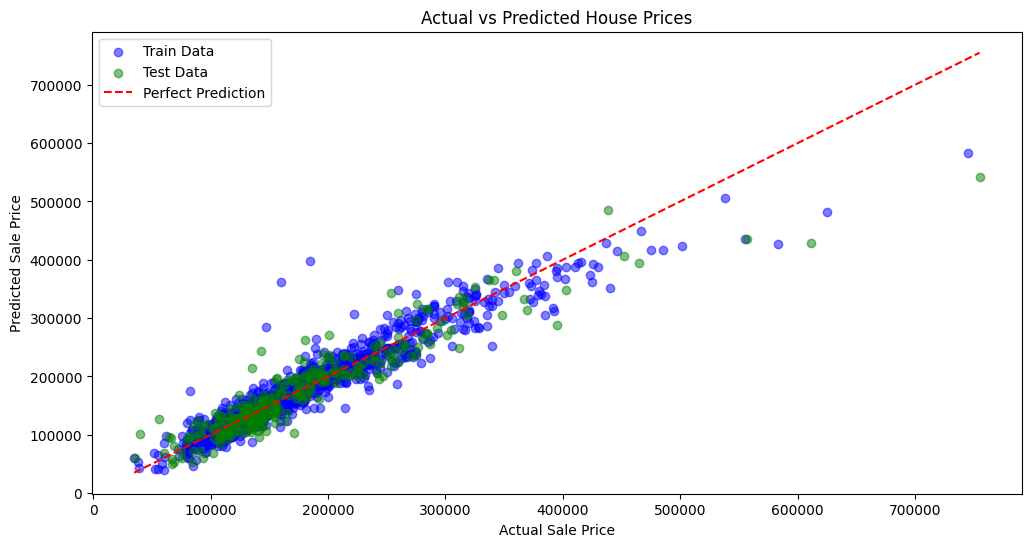

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get predictions on training data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# --- Error Metrics ---
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

# --- Plot Actual vs Predicted for Training data ---
plt.figure(figsize=(12,6))
plt.scatter(y_train, y_train_pred, color="blue", alpha=0.5, label="Train Data")
plt.scatter(y_test, y_test_pred, color="green", alpha=0.5, label="Test Data")

# Ideal line (perfect prediction)
lims = [min(y.min(), y_test.min()), max(y.max(), y_test.max())]
plt.plot(lims, lims, "r--", label="Perfect Prediction")

plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()


# Linear Regression

In [4]:
train_df = pd.read_csv("/kaggle/input/house-price/house_price_train.csv")
test_df = pd.read_csv("/kaggle/input/house-price/house_price_test.csv")


In [22]:
x = train_df["OverallQual"]
y = train_df["SalePrice"]

df = pd.DataFrame({
    "OverallQual": x,
    "SalePrice": y
})

print(df.head())


   OverallQual  SalePrice
0            7     208500
1            6     181500
2            7     223500
3            7     140000
4            8     250000


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df.drop(labels = ['SalePrice'],axis = 1),
    df['SalePrice'],
    test_size = 0.3,
    random_state = 0
)

model = LinearRegression()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

In [36]:
from sklearn.metrics import r2_score, mean_squared_error
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.6479214932363068
MSE: 2390257968.965773


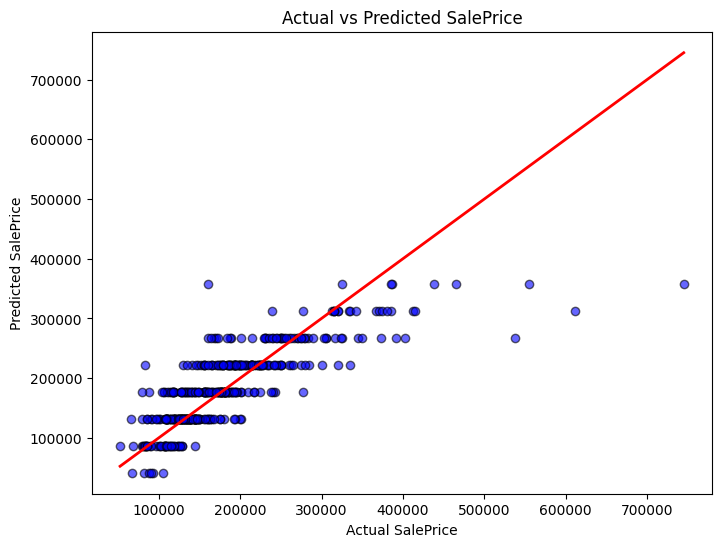

In [35]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6, edgecolor="k")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", lw=2)  # 45-degree line (perfect prediction)

plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted SalePrice")
plt.show()


# Multilinear Regression

In [37]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Suppose we pick multiple features
X = train_df[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']]  # Independent variables
y = train_df['SalePrice']  # Dependent variable

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# Create model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Evaluate performance
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)

# Show coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)


R² Score: 0.7042537955127075
RMSE: 44808.68722649152
       Feature   Coefficient
0  OverallQual  21721.667481
1    GrLivArea     50.783512
2   GarageCars  17004.342964
3  TotalBsmtSF     42.195251


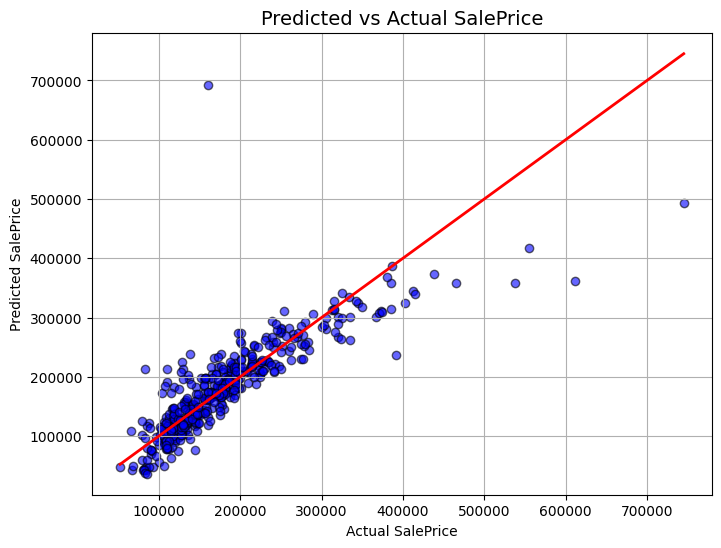

In [38]:
import matplotlib.pyplot as plt

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6, edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color="red", linewidth=2)  # Ideal line

plt.title("Predicted vs Actual SalePrice", fontsize=14)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.grid(True)
plt.show()
